 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial import of functions & packages
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Set path to CSV files

whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Read the whale return csv file
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [4]:
# Count nulls in the whale return csv
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON CO INC                 1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls in the whale return csv
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON CO INC                 0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Rename columns in the whale return csv for easier use
whale_returns_df = whale_returns_df.rename(columns={
    "SOROS FUND MANAGEMENT LLC" : "SOROS",
    "PAULSON CO INC" : "PAULSON",
    "TIGER GLOBAL MANAGEMENT LLC" : "TIGER",
    "BERKSHIRE HATHAWAY INC" : "BERKSHIRE"
})

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Read the algorithmic returns csv
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls in the algorithmic returns csv
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls in the algorithmic returns csv
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Read the S&P 500 Closing Prices csv
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [11]:
# Check Data Types in S&P 500 DataFrame
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
# Clean data in the S&P 500 Closing Prices dataframe

# Remove $ from close price in the S&P 500 DataFrame
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")

# Convert the close price in the S&P 500 DataFrame from object to float
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

# Print the first 10 rows of updated S&P 500 DataFrame to check format
sp500_history_df.head(10)

/Users/nbaronti/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [13]:
# Calculate daily returns & drop nulls in the S&P 500 dataframe
sp500_history_df = sp500_history_df.pct_change().dropna()
sp500_history_df.head(10)

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


In [14]:
# Rename `Close` column in S&P 500 dataframe
sp500_history_df = sp500_history_df.rename(columns={
    "Close" : "S&P 500"})
sp500_history_df.head(10)

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_return_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner", sort=True)
combined_daily_return_df.head(10)

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

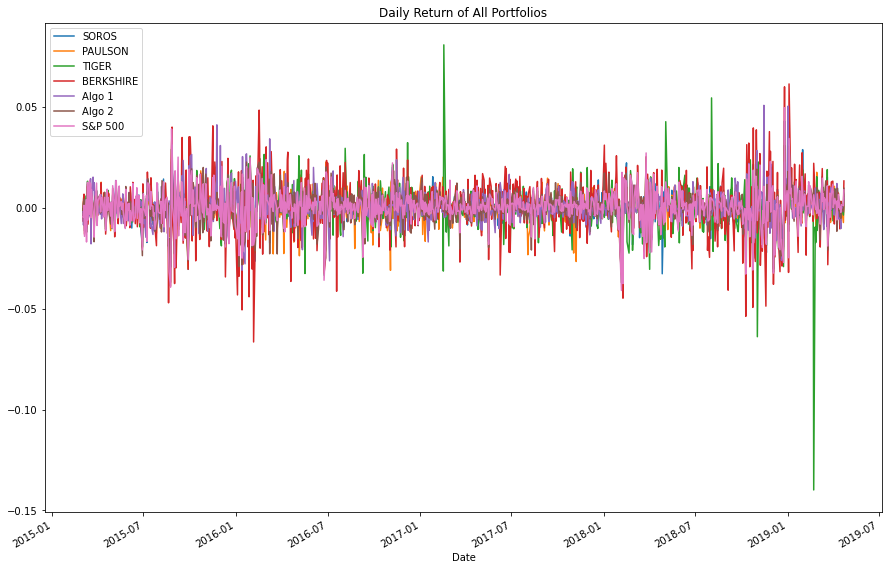

In [16]:
# Plot daily returns of all portfolios
combined_daily_return_df.plot(figsize=[15,10], title="Daily Return of All Portfolios");

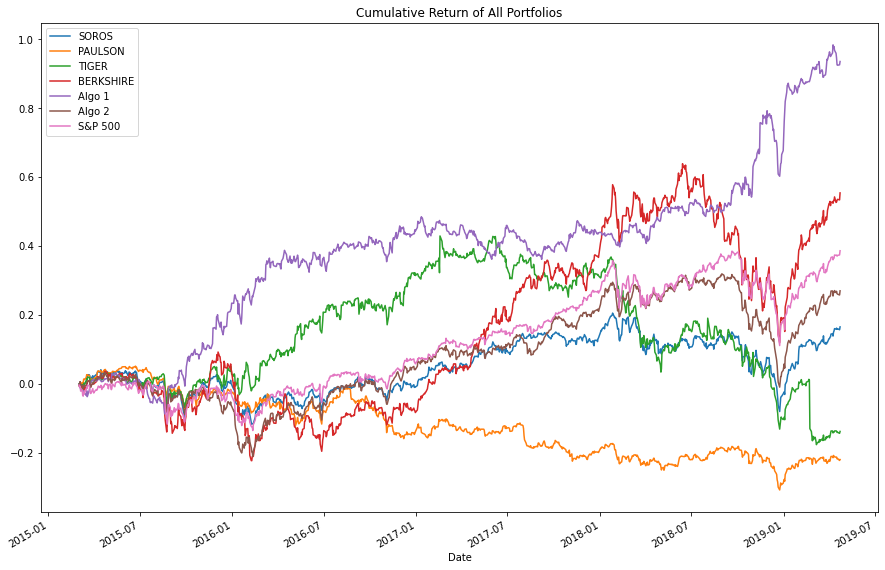

In [17]:
# Calculate cumulative return for each portfolio using for loop

cumulative_return_df = pd.DataFrame()

for portfolio in combined_daily_return_df:
    cumulative_return_df[portfolio] = (1 + combined_daily_return_df[portfolio]).cumprod() - 1
    
# Plot cumulative return for each portfolio

cumulative_return_df.plot(figsize=[15,10], title="Cumulative Return of All Portfolios");

#### Calculate and Plot cumulative returns.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


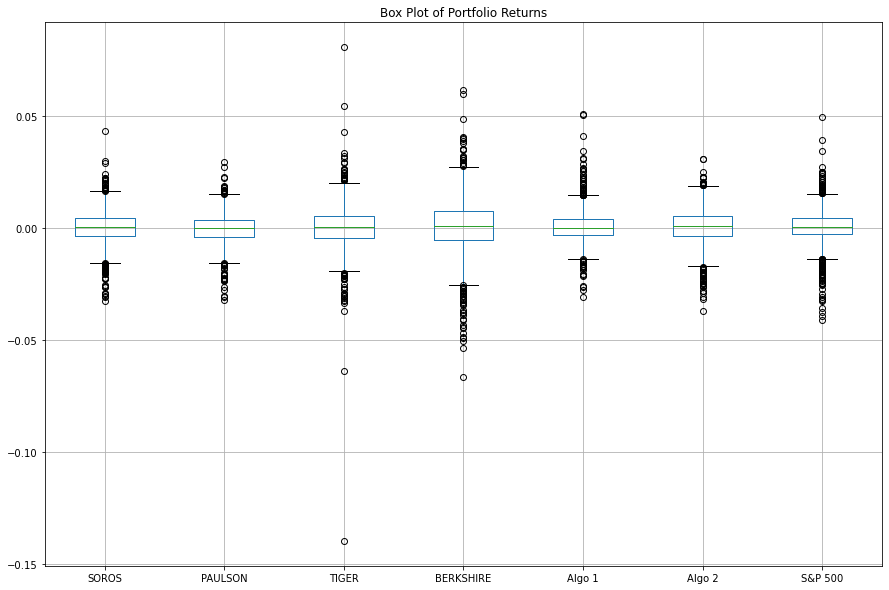

In [18]:
# Box plot to visually show risk of each portfolio

boxplot = combined_daily_return_df.boxplot(figsize=[15,10]);
boxplot.set_title("Box Plot of Portfolio Returns");

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
portfolio_daily_std = combined_daily_return_df.std()
portfolio_daily_std.sort_values(ascending=False, inplace=True)
std_df = pd.DataFrame(portfolio_daily_std, columns=["Standard Deviation"])
std_df

,Standard Deviation
BERKSHIRE,0.012919
TIGER,0.010894
S&P 500,0.008554
Algo 2,0.008342
SOROS,0.007895
Algo 1,0.007620
PAULSON,0.007023


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate the daily standard deviation of S&P 500
sp500_std = std_df.loc["S&P 500"].values[0]
sp500_std

# Determine which portfolios are riskier than the S&P 500
for x in std_df.index:
    if x == "S&P 500":
        pass
    elif std_df.loc[x].values[0] > sp500_std:
        print(f"{x} is more risky than S&P 500")
    else:
        print(f"{x} is less risky than S&P 500")

BERKSHIRE is more risky than S&P 500
TIGER is more risky than S&P 500
Algo 2 is less risky than S&P 500
SOROS is less risky than S&P 500
Algo 1 is less risky than S&P 500
PAULSON is less risky than S&P 500


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_annualized_std = portfolio_daily_std * np.sqrt(252)
portfolio_annualized_std.head(10)

BERKSHIRE    0.205077
TIGER        0.172936
S&P 500      0.135786
Algo 2       0.132430
SOROS        0.125335
Algo 1       0.120967
PAULSON      0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfoliosusing a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

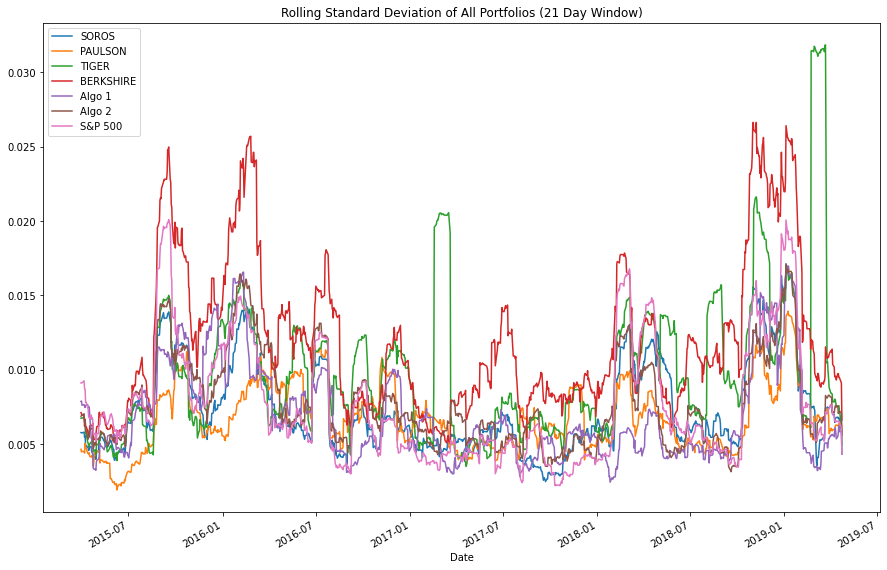

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_df = combined_daily_return_df.rolling(window=21).std()

rolling_std_df.plot(figsize=(15,10), title= "Rolling Standard Deviation of All Portfolios (21 Day Window)");

### Calculate and plot the correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


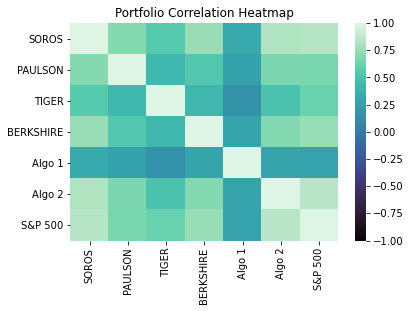

In [23]:
# Calculate the correlation
correlation_df = combined_daily_return_df.corr()

# Display the correlation matrix
sns_heatmap = sns.heatmap(correlation_df, vmin=-1, vmax=1, cmap="mako");
sns_heatmap.set_title("Portfolio Correlation Heatmap")
correlation_df

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

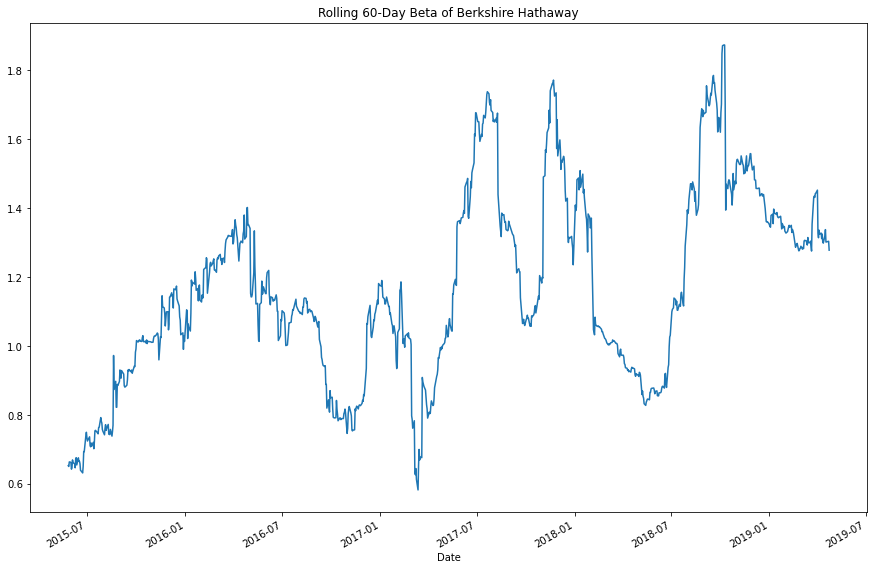

In [24]:
# Calculate covariance of a Berkshire Hathaway portfolio
berkshire_covariance = combined_daily_return_df['BERKSHIRE'].rolling(window=60).cov(combined_daily_return_df['S&P 500'])

# Calculate variance of S&P 500
sp500_variance = combined_daily_return_df['S&P 500'].rolling(window=60).var()

# Computing beta of Berkshire Hathaway portfolio
berkshire_beta = berkshire_covariance / sp500_variance

# Plot beta trend for Berkshire Hathaway
berkshire_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of Berkshire Hathaway');


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling 21 day weighted moving average mean of each portfolio
combined_daily_return_df.ewm(halflife=21).mean()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios of each portfolio
portfolio_sharpe_ratio = (combined_daily_return_df.mean() * 252) / (combined_daily_return_df.std() * np.sqrt(252))
portfolio_sharpe_ratio

SOROS        0.356417
PAULSON     -0.483570
TIGER       -0.121060
BERKSHIRE    0.621810
Algo 1       1.378648
Algo 2       0.501364
S&P 500      0.648267
dtype: float64

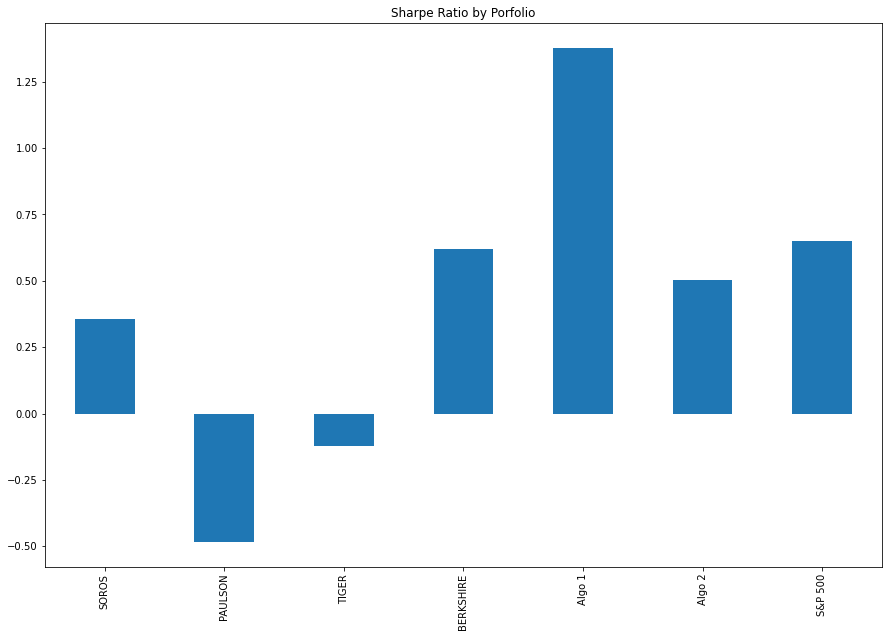

In [27]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratio.plot(kind='bar', title='Sharpe Ratio by Porfolio', figsize=(15, 10));

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 has a higher sharpe ratio than both the S&P 500 and the whale portfolios.

Algo 2 has a higher sharpe ratio than select whale portfolios (i.e., SOROS, PAULSON, TIGER), however does not have a higher sharpe ratio than  the S&P 500 or Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from aapl csv
aapl_prices_path = Path("Resources/aapl_historical.csv")
aapl_prices_df = pd.read_csv(aapl_prices_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_prices_df.sort_index(inplace=True)
aapl_prices_df.drop("Symbol", 1, inplace = True)
aapl_prices_df.head(10)

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
2018-05-18,186.31
2018-05-21,187.63
2018-05-22,187.16
2018-05-23,188.36


In [29]:
# Reading data from cost csv
cost_prices_path = Path("Resources/cost_historical.csv")
cost_prices_df = pd.read_csv(cost_prices_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_prices_df.sort_index(inplace=True)
cost_prices_df.drop("Symbol", 1, inplace = True)
cost_prices_df.head(10)

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
2018-05-18,198.96
2018-05-21,199.62
2018-05-22,198.97
2018-05-23,198.14


In [30]:
# Reading data from goog stock
goog_prices_path = Path("Resources/goog_historical.csv")
goog_prices_df = pd.read_csv(goog_prices_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_prices_df.sort_index(inplace=True)
goog_prices_df.drop("Symbol", 1, inplace = True)
goog_prices_df.head(10)

,NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
2018-05-18,1066.36
2018-05-21,1079.58
2018-05-22,1069.73
2018-05-23,1079.69


In [31]:
# Combine all stocks in a single DataFrame
stock_daily_price_df = pd.concat([aapl_prices_df, cost_prices_df, goog_prices_df], axis="columns", join="inner", sort=True)
stock_daily_price_df.columns = ["AAPL", "COST", "GOOG"]
stock_daily_price_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [32]:
# Calculate daily returns, drop N/As, and display daily returns
stock_daily_return_df = stock_daily_price_df.pct_change().dropna()
stock_daily_return_df.head()


,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [33]:
# Calculate daily log returns, drop N/As, and display daily returns
stock_log_return_df = np.log(stock_daily_price_df/stock_daily_price_df.shift(1)).dropna()
stock_log_return_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002336,0.000613,0.001765
2018-05-15,-0.009130,-0.002044,-0.019244
2018-05-16,0.009289,0.016388,0.002351
2018-05-17,-0.006344,0.004469,-0.002944
2018-05-18,-0.003643,-0.003212,-0.011404


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = np.array([1/3, 1/3, 1/3])

# Calculate portfolio return
weighted_return_df = stock_log_return_df * weights
weighted_return_df["MY PORTFOLIO"] = weighted_return_df.sum(1)
weighted_return_df.head()

,AAPL,COST,GOOG,MY PORTFOLIO
Trade DATE,,,,
2018-05-14,-0.000779,0.000204,0.000588,0.000014
2018-05-15,-0.003043,-0.000681,-0.006415,-0.010139
2018-05-16,0.003096,0.005463,0.000784,0.009343
2018-05-17,-0.002115,0.001490,-0.000981,-0.001606
2018-05-18,-0.001214,-0.001071,-0.003801,-0.006086


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
combined_stock_fund_df = pd.concat([weighted_return_df["MY PORTFOLIO"], combined_daily_return_df], axis="columns", join="inner", sort=True)
combined_stock_fund_df.head(10)

,MY PORTFOLIO,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
2018-05-14,0.000014,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010139,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009343,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001606,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006086,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,0.007564,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387
2018-05-22,-0.004978,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003136
2018-05-23,0.003826,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.003248
2018-05-24,0.000749,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,-0.002023
2018-05-25,-0.001236,0.002146,0.002160,0.008299,-0.000916,-0.001142,-0.001605,-0.002357


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
combined_stock_fund_std = combined_stock_fund_df.std() * np.sqrt(252)
combined_stock_fund_std

MY PORTFOLIO    0.212207
SOROS           0.146675
PAULSON         0.116732
TIGER           0.232531
BERKSHIRE       0.247155
Algo 1          0.133704
Algo 2          0.139556
S&P 500         0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

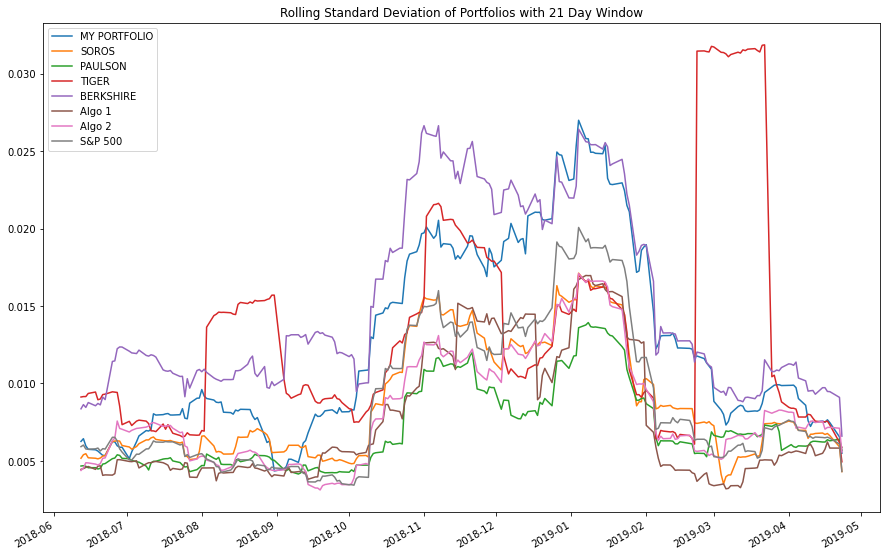

In [37]:
# Calculate rolling standard deviation
rolling_stock_fund_df = combined_stock_fund_df.rolling(window=21).std()

# Plot rolling standard deviation
rolling_stock_fund_df.plot(figsize=(15,10), title= "Rolling Standard Deviation of Portfolios with 21 Day Window");

### Calculate and plot the correlation

,MY PORTFOLIO,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,S&P 500
MY PORTFOLIO,1.000000,0.731835,0.643326,0.392377,0.799645,0.258373,0.739448,0.870834
SOROS,0.731835,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON,0.643326,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER,0.392377,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE,0.799645,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.258373,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739448,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.870834,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


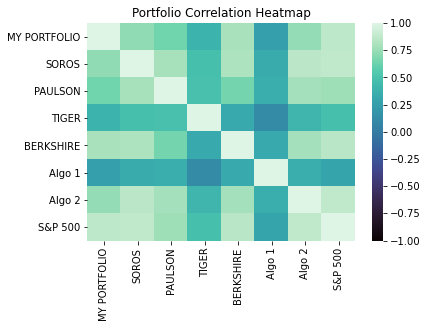

In [38]:
# Calculate and plot the correlation
combined_stock_fund_corr = combined_stock_fund_df.corr()

sns_heatmap = sns.heatmap(combined_stock_fund_corr, vmin=-1, vmax=1, cmap="mako");
sns_heatmap.set_title("Portfolio Correlation Heatmap")
combined_stock_fund_corr

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

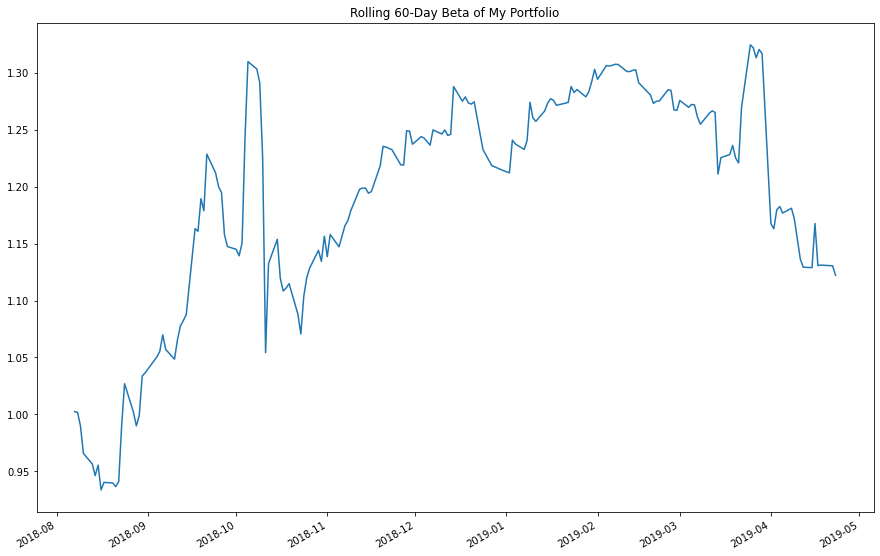

In [39]:
# Calculate covariance of my portfolio
my_portfolio_covariance = combined_stock_fund_df["MY PORTFOLIO"].rolling(window=60).cov(combined_stock_fund_df['S&P 500'])

# Calculate variance of S&P 500
sp500_variance = combined_stock_fund_df['S&P 500'].rolling(window=60).var()

# Computing my portfolio beta
my_portfolio_beta = my_portfolio_covariance / sp500_variance

# Plot beta trend
my_portfolio_beta.plot(figsize=(15, 10), title='Rolling 60-Day Beta of My Portfolio');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate portfolio mean annual return
combined_stock_fund_mean = combined_stock_fund_df.mean() * 252

# Calculate expected volatility of my portfolio
combined_stock_fund_sharpe = combined_stock_fund_mean / combined_stock_fund_std
combined_stock_fund_sharpe

MY PORTFOLIO    0.773614
SOROS           0.430713
PAULSON         0.258738
TIGER          -1.034216
BERKSHIRE       0.159756
Algo 1          2.035665
Algo 2          0.080607
S&P 500         0.584820
dtype: float64

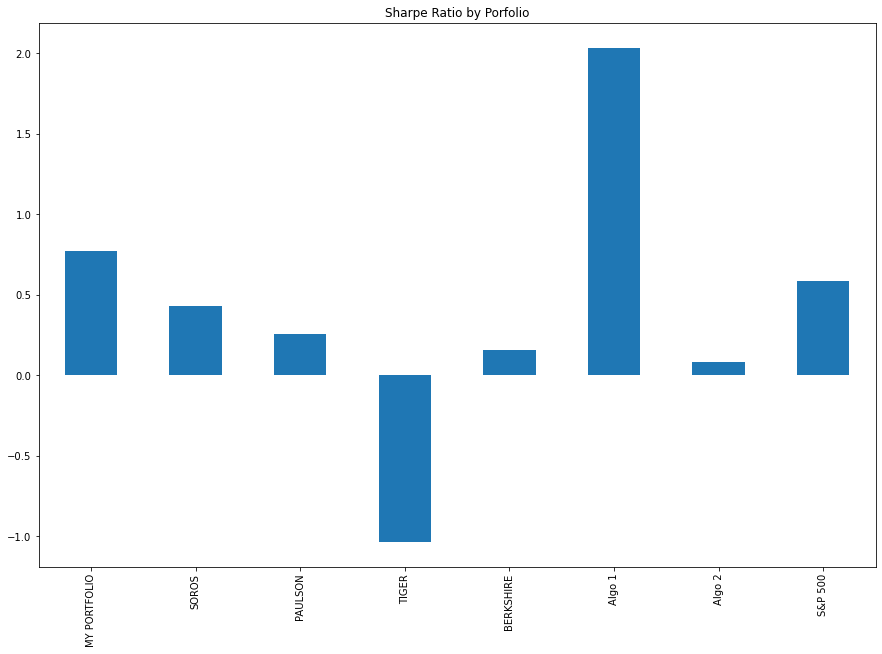

In [41]:
# Visualize the sharpe ratios as a bar plot
combined_stock_fund_sharpe.plot(kind='bar', title='Sharpe Ratio by Porfolio', figsize=(15, 10));

### How does your portfolio do?

Write your answer here!

My equally weighted portfolio of AAPL, GOOG, & COST had a higher sharpe ratio than the S&P 500 during the time period provided (2018 - 2019).  However, my portfolio's sharpe ratio was lower than Algo 1.